# Feature Plots

### Imports

In [25]:
import scanpy.api as sc

In [26]:
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:100% !important; }</style>"))

In [27]:
repo_path = '/Users/mincheolkim/Github/'
data_path = '/Users/mincheolkim/Documents/'

In [28]:
import sys
sys.path.append(repo_path + 'scVI')
sys.path.append(repo_path + 'scVI-extensions')

In [29]:
import os

import numpy as np
from sklearn.manifold import TSNE
from anndata import AnnData
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
import pandas as pd
import torch
import scipy.sparse as sp_sparse
import imp
from scipy.stats import ttest_ind, wasserstein_distance, ks_2samp
import umap
from scipy.stats import norm
from sklearn.manifold import TSNE
import h5py

from scvi.metrics.clustering import entropy_batch_mixing, get_latent
from scvi.models import VAE, SVAEC, VAEC
from scvi.inference import VariationalInference

In [30]:
import scvi_extensions.dataset.supervised_data_loader as sdl
import scvi_extensions.dataset.cropseq as cs
import scvi_extensions.inference.supervised_variational_inference as svi
import scvi_extensions.hypothesis_testing.mean as mn
import scvi_extensions.hypothesis_testing.variance as vr
import scvi_extensions.dataset.label_data_loader as ldl

### Create a dataset

In [31]:
h5_filename = data_path + 'raw_gene_bc_matrices_h5.h5'
metadata_filename = data_path + 'nsnp20.raw.sng.km_vb1_default.norm.meta.txt'

In [34]:
imp.reload(cs)
# Load the dataset
gene_dataset = cs.CropseqDataset(
    filename=h5_filename,
    metadata_filename=metadata_filename,
    use_donors=True,
    use_labels='gene',
    save_path='',
    remove_guides=False)

Preprocessing CROP-seq dataset
Number of cells kept after filtering with metadata: 283634
Number of cells kept after removing all zero cells: 283634
Finished preprocessing CROP-seq dataset


### Read the AnnData with tSNE coordinates

In [50]:
embedded_adata = sc.read('/Users/mincheolkim/Documents/scvi_outputs/anndata.h5ad')

### Create a AnnData

In [37]:
raw_adata = AnnData(gene_dataset.X)

In [40]:
raw_adata.var_names = gene_dataset.gene_names

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [46]:
raw_adata.var['gene_ids'] = np.arange(gene_dataset.gene_names.shape[0])

### Transfer over information

In [57]:
raw_adata.obsm['X_umap'] = embedded_adata.obsm['X_umap']
raw_adata.obsm['X_tsne'] = embedded_adata.obsm['X_tsne']

In [61]:
raw_adata.obs['louvain'] = embedded_adata.obs['louvain']

In [129]:
raw_adata.write('/Users/mincheolkim/Documents/scvi_outputs/final_louvain/raw_gene_guide_embeddings_anndata.h5ad')

### Feature maps

In [74]:
gene_dataset.gene_names[pd.Series(gene_dataset.gene_names).str.contains('IFNG')]

array(['IFNGR1', 'IFNG-AS1', 'IFNG', 'IFNGR2'], dtype='<U44')

### Add well information

In [130]:
metadata = pd.read_csv(metadata_filename, sep='\t')

In [133]:
raw_adata.obs['well'] = metadata.query('guide_cov != "Undetermined"')['well_cov'].astype('category').values

### Log some genes

In [124]:
genes_of_interest = ['IL2RA', 'IL27RA', 'CCR2', 'IL32', 'IL23A','SELL', 'GNLY', 'GZMB', 'IL4R', 'CCR7', 'NKG7', 'IFNG', 'TNFRSF18']

for gene in genes_of_interest:
    raw_adata.obs[gene + '_indicator'] = raw_adata.X[:, np.where(raw_adata.var.index == gene)[0][0]].todense() > 0
    temp = np.log(raw_adata.X[:, np.where(raw_adata.var.index == gene)[0][0]].todense()).A1
    temp[np.isneginf(temp)] = 0
    raw_adata.obs[gene + '_log'] = temp

### Indicator gene Plots

saving figure to file ./figures/tsne_feature_IL2RA_indicator.png


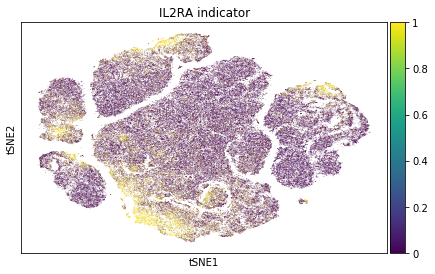

saving figure to file ./figures/tsne_feature_IL27RA_indicator.png


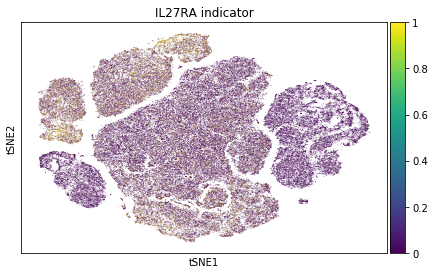

saving figure to file ./figures/tsne_feature_CCR2_indicator.png


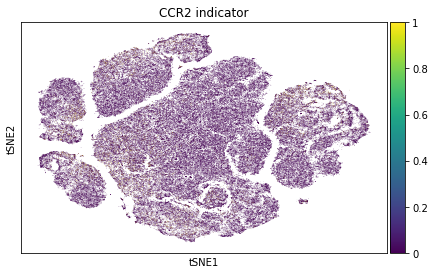

saving figure to file ./figures/tsne_feature_IL32_indicator.png


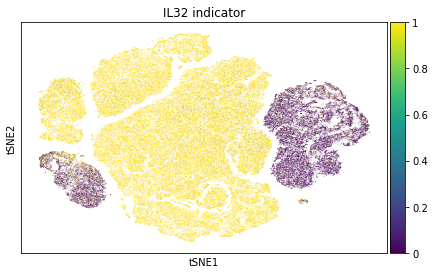

saving figure to file ./figures/tsne_feature_IL23A_indicator.png


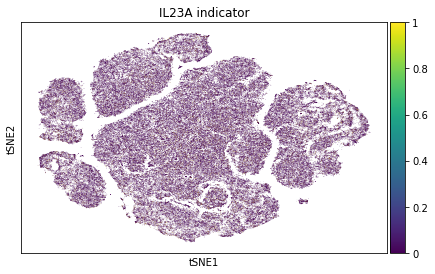

saving figure to file ./figures/tsne_feature_SELL_indicator.png


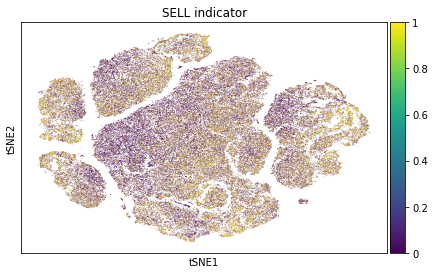

saving figure to file ./figures/tsne_feature_GNLY_indicator.png


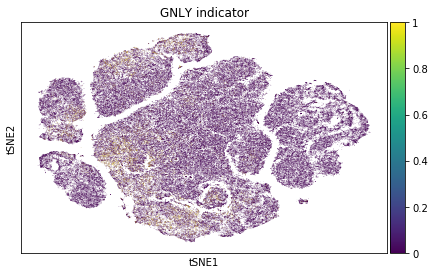

saving figure to file ./figures/tsne_feature_GZMB_indicator.png


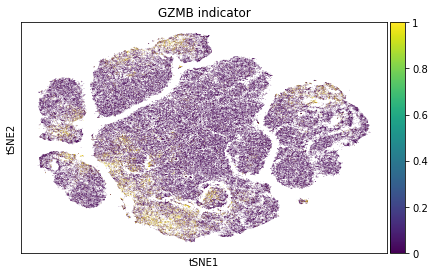

saving figure to file ./figures/tsne_feature_IL4R_indicator.png


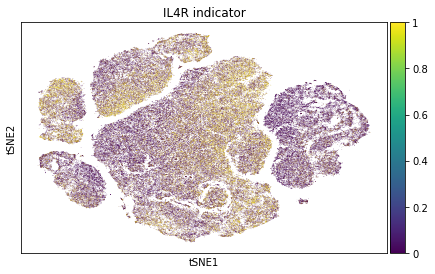

saving figure to file ./figures/tsne_feature_CCR7_indicator.png


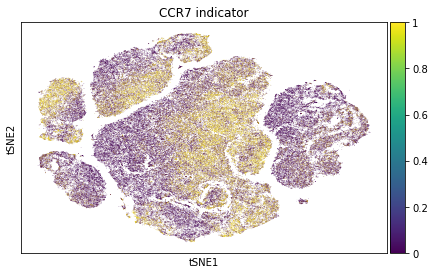

saving figure to file ./figures/tsne_feature_NKG7_indicator.png


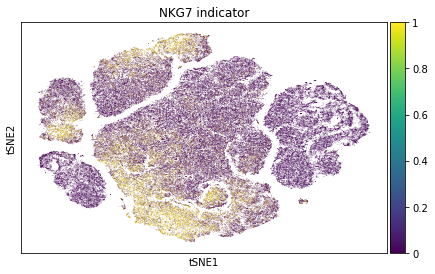

saving figure to file ./figures/tsne_feature_IFNG_indicator.png


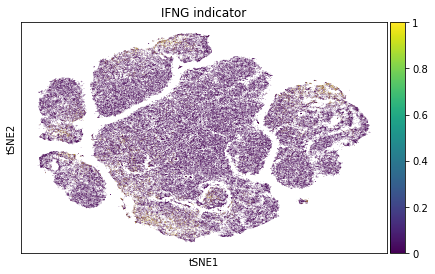

saving figure to file ./figures/tsne_feature_TNFRSF18_indicator.png


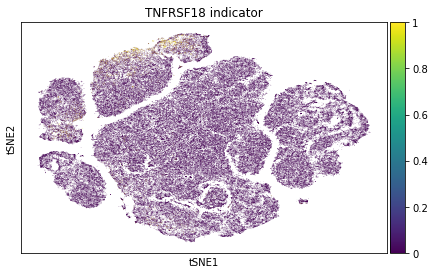

In [128]:
for gene in genes_of_interest:
    sc.pl.tsne(
        raw_adata, 
        save='_feature_{}_indicator.png'.format(gene),
        color=gene + '_indicator')

saving figure to file ./figures/tsne_feature_IL2RA.png


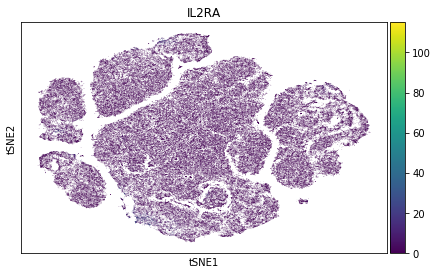

saving figure to file ./figures/tsne_feature_IL27RA.png


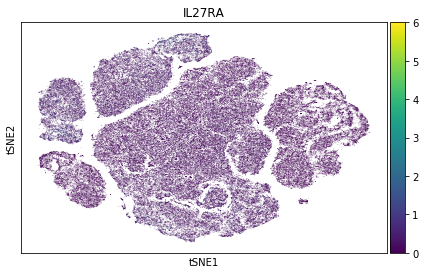

saving figure to file ./figures/tsne_feature_CCR2.png


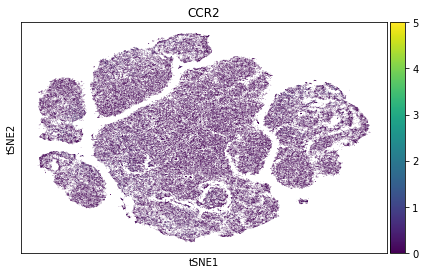

saving figure to file ./figures/tsne_feature_IL32.png


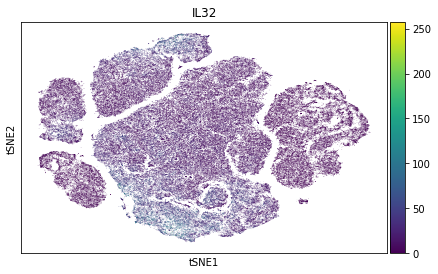

saving figure to file ./figures/tsne_feature_IL23A.png


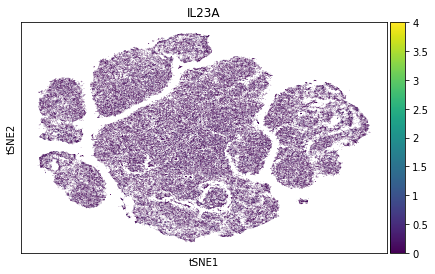

saving figure to file ./figures/tsne_feature_SELL.png


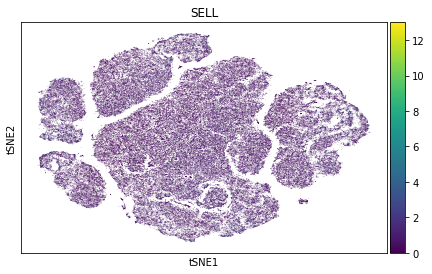

saving figure to file ./figures/tsne_feature_GNLY.png


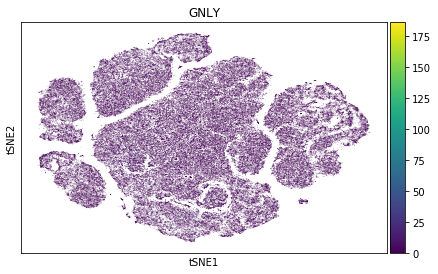

saving figure to file ./figures/tsne_feature_GZMB.png


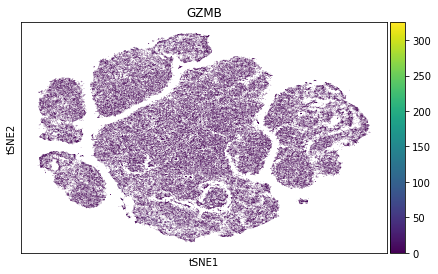

saving figure to file ./figures/tsne_feature_IL4R.png


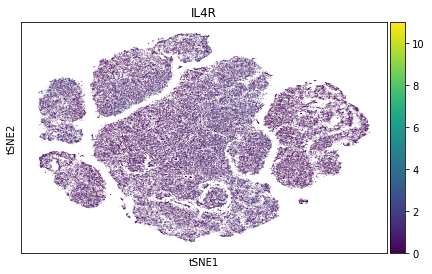

saving figure to file ./figures/tsne_feature_CCR7.png


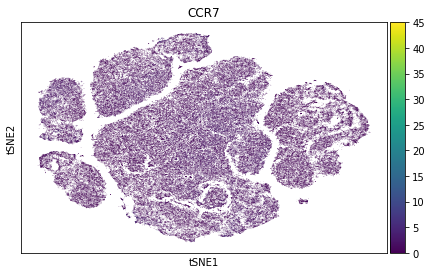

saving figure to file ./figures/tsne_feature_NKG7.png


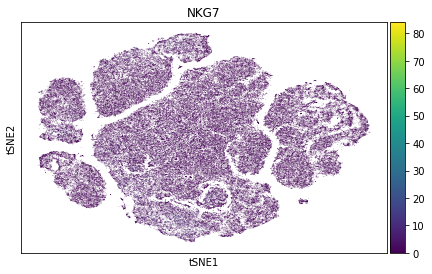

saving figure to file ./figures/tsne_feature_IFNG.png


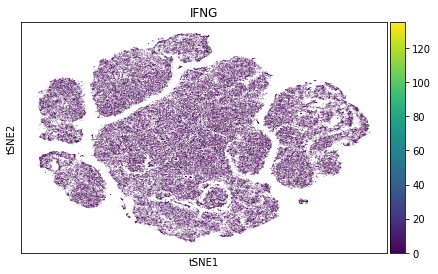

saving figure to file ./figures/tsne_feature_TNFRSF18.png


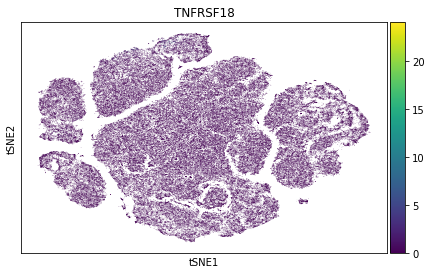

In [126]:
for gene in genes_of_interest:
    sc.pl.tsne(
        raw_adata, 
        save='_feature_{}.png'.format(gene),
        color=gene)

saving figure to file ./figures/tsne_feature_IL2RA_log.png


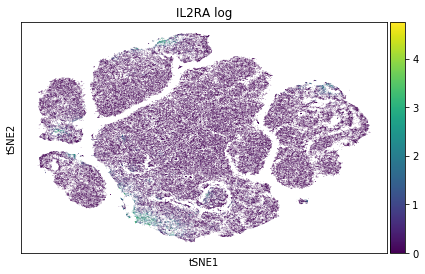

saving figure to file ./figures/tsne_feature_IL27RA_log.png


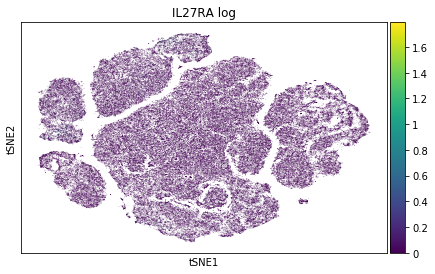

saving figure to file ./figures/tsne_feature_CCR2_log.png


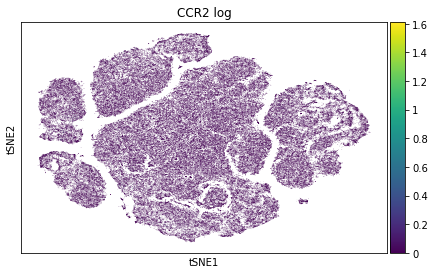

saving figure to file ./figures/tsne_feature_IL32_log.png


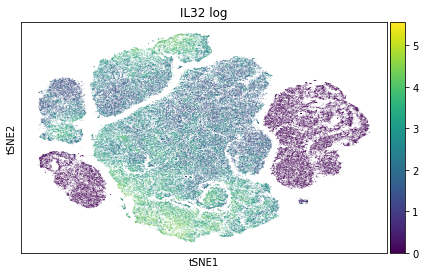

saving figure to file ./figures/tsne_feature_IL23A_log.png


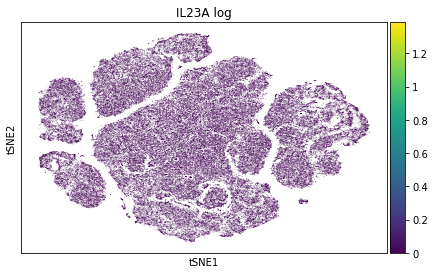

saving figure to file ./figures/tsne_feature_SELL_log.png


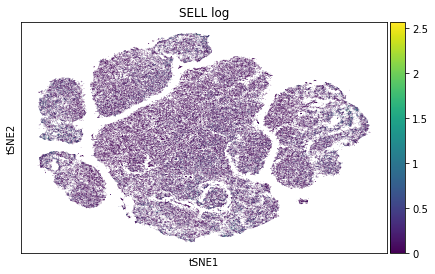

saving figure to file ./figures/tsne_feature_GNLY_log.png


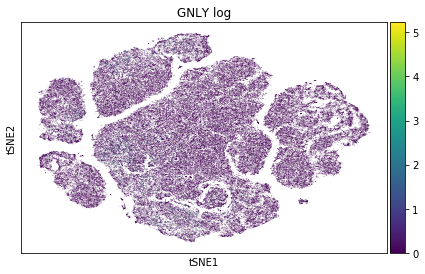

saving figure to file ./figures/tsne_feature_GZMB_log.png


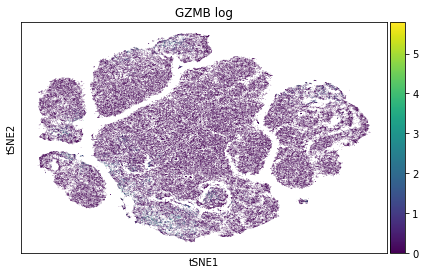

saving figure to file ./figures/tsne_feature_IL4R_log.png


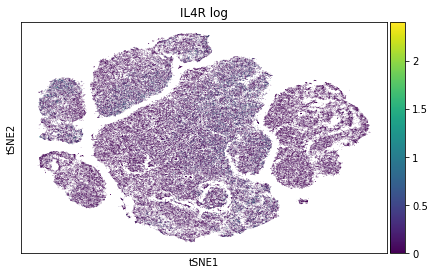

saving figure to file ./figures/tsne_feature_CCR7_log.png


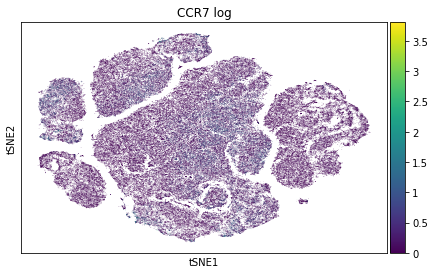

saving figure to file ./figures/tsne_feature_NKG7_log.png


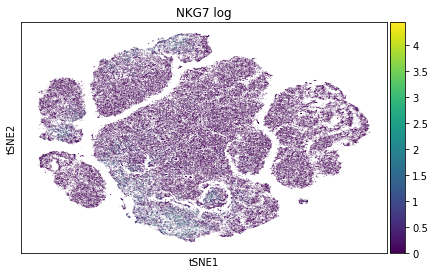

saving figure to file ./figures/tsne_feature_IFNG_log.png


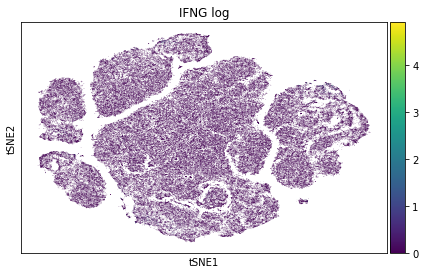

saving figure to file ./figures/tsne_feature_TNFRSF18_log.png


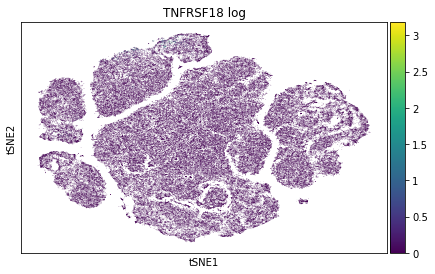

In [127]:
for gene in genes_of_interest:
    sc.pl.tsne(
        raw_adata, 
        save='_feature_{}_log.png'.format(gene),
        color=gene + '_log')